In [1]:
# Importing necessary libraries and modules
import numpy as np
import IPython
import scipy
import math
import matplotlib

import pandas as pd
from scipy import signal as sp
from scipy.io import wavfile

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

In [2]:
%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 10})

pi = np.pi

In [3]:
#Roll number: 191EE114
alpha = 1 + 114 % 3  
print(alpha)

1


## Problem 1

Text(0, 0.5, 'x(t)')

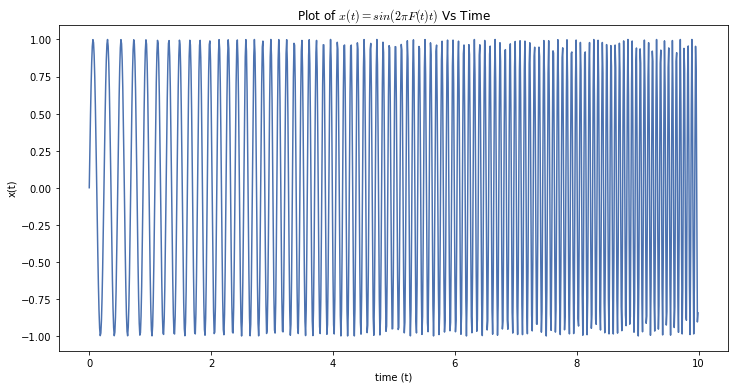

In [4]:
Fs = 100
t = np.arange(0, 10, 1/Fs)
f = 0.3 * (alpha + 1) * t + (2 + 2 * alpha)
ft = np.multiply(f, t)
xt = np.sin(2 * pi * ft)

plt.plot(t, xt)
plt.title("Plot of $x(t) = sin(2\pi F(t)t)$ Vs Time")
plt.xlabel("time (t)")
plt.ylabel("x(t)")

In [5]:
def plot_mag(x, Fs, interpolate = None, max_freq = None, label = None, color = None, normalization = False):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C])
    N = Fs * np.arange(0, C) / len(x);
    X_norm = X
    if normalization:
        X_norm = (1/C) * X;
    if interpolate == False:
      if color == None:
        plt.stem(N, X_norm, label = label)
      else:
        plt.stem(N, X_norm, color, label = label)
    else:
      if color == None:
        plt.plot(N, X_norm, label = label)
      else:
        plt.plot(N, X_norm, color, label = label)

    if label:
        plt.legend(loc = 'upper right')
    return N, X_norm

Text(0.5, 0, 'Frequency (Hz)')

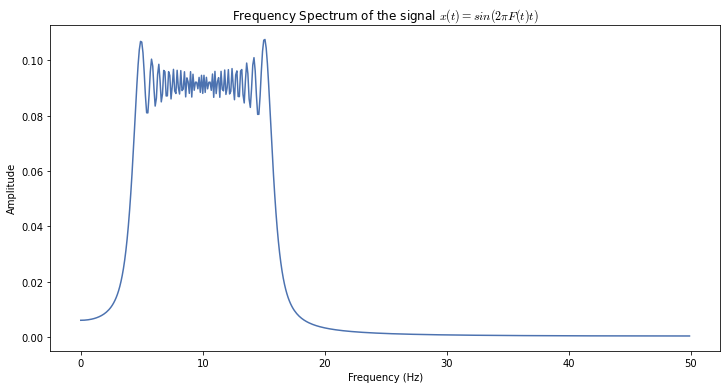

In [6]:
N, X = plot_mag(xt, Fs, interpolate=True, normalization=True)
plt.title("Frequency Spectrum of the signal $x(t) = sin(2\pi F(t)t)$")
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")

array([ 4.9,  5.8,  6.4,  6.8,  7.2,  7.6,  7.9,  8.2,  8.5,  8.7,  9. ,
        9.2,  9.4,  9.7,  9.9, 10.1, 10.3, 10.6, 10.8, 11. , 11.3, 11.5,
       11.8, 12.1, 12.4, 12.8, 13.2, 13.6, 14.2, 15.1])

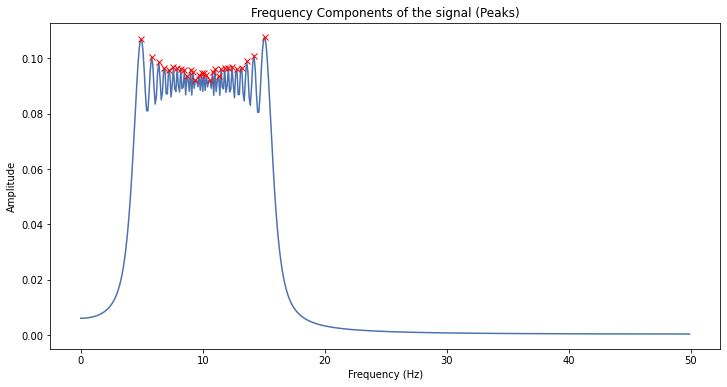

In [7]:
peak, _ = sp.find_peaks(X, threshold=0.00001)
plt.plot(N, X)
plt.plot(N[peak], X[peak],'rx')
plt.title("Frequency Components of the signal (Peaks)")
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")
N[peak]

In [8]:
def plot_spectrum(X, Fs, window, nperseg, noverlap):
  # fig = plt.figure()
  freqs, time, Sxx = sp.spectrogram(X, fs=Fs, window=(window), nperseg=nperseg, noverlap=noverlap)
  plt.pcolormesh(time, freqs, Sxx, shading='gouraud')
  cbar = plt.colorbar()
  cbar.set_label("Amplitude")
  cbar.minorticks_on()
  plt.xlabel("Time (t)")
  plt.ylabel("Frequency (Hz)")
  return freqs, time, Sxx

Text(0.5, 1.0, 'Hanning Window, 200 samples with 10 samples overlap')

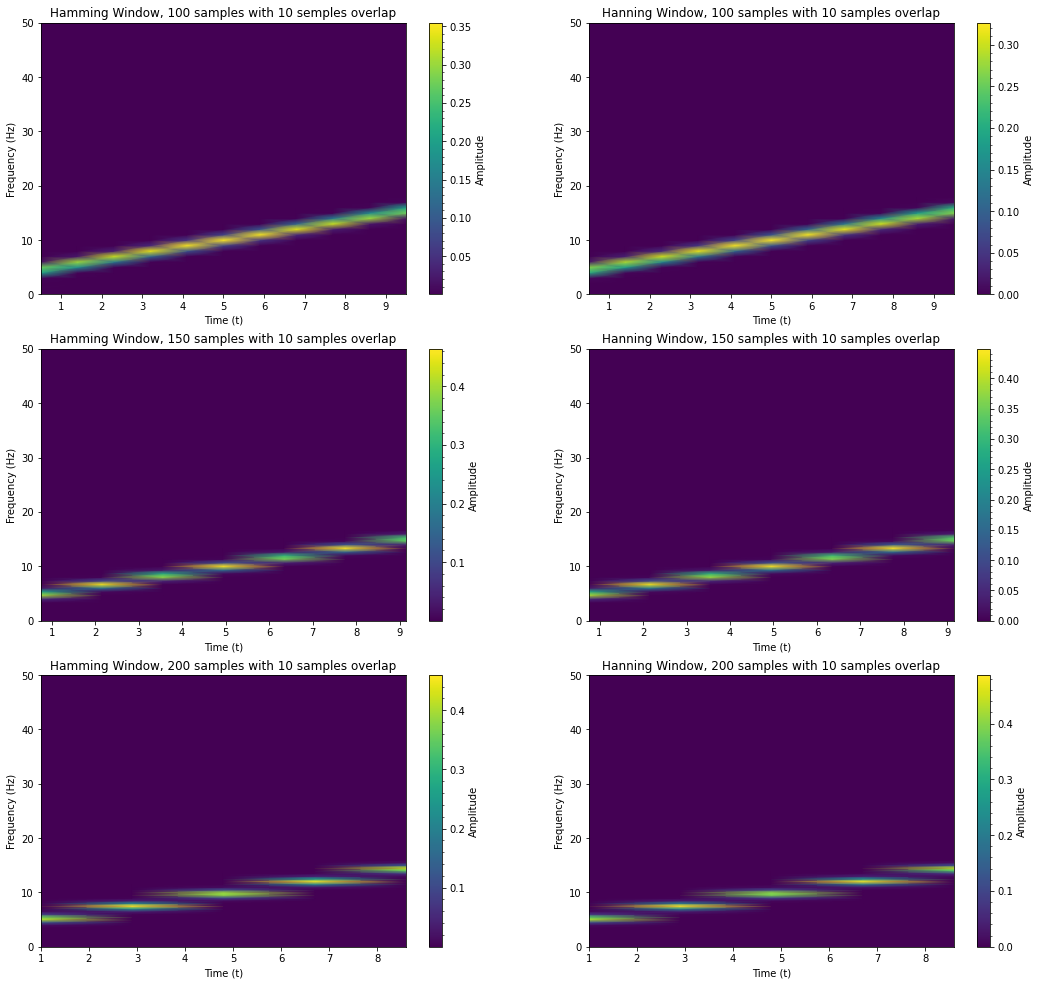

In [9]:
fig = plt.figure(figsize=(18, 17))

plt.subplot(3, 2, 1)
freqs, time, Sxx = plot_spectrum(xt, Fs, 'hamming', nperseg=100, noverlap=10)
plt.title("Hamming Window, 100 samples with 10 semples overlap")

plt.subplot(3, 2, 3)
freqs, time, Sxx = plot_spectrum(xt, Fs, 'hamming', nperseg=150, noverlap=10)
plt.title("Hamming Window, 150 samples with 10 samples overlap")

plt.subplot(3, 2, 5)
freqs, time, Sxx = plot_spectrum(xt, Fs, 'hamming', nperseg=200, noverlap=10)
plt.title("Hamming Window, 200 samples with 10 samples overlap")

plt.subplot(3, 2, 2)
freqs, time, Sxx = plot_spectrum(xt, Fs, 'hanning', nperseg=100, noverlap=10)
plt.title("Hanning Window, 100 samples with 10 samples overlap")

plt.subplot(3, 2, 4)
freqs, time, Sxx = plot_spectrum(xt, Fs, 'hanning', nperseg=150, noverlap=10)
plt.title("Hanning Window, 150 samples with 10 samples overlap")

plt.subplot(3, 2, 6)
freqs, time, Sxx = plot_spectrum(xt, Fs, 'hanning', nperseg=200, noverlap=10)
plt.title("Hanning Window, 200 samples with 10 samples overlap")

## Problem 2

In [10]:
Fs_1, track = wavfile.read("instru1.wav")
track = track/32767.0
IPython.display.Audio(track, rate =  Fs_1)

Text(0, 0.5, 'Amplitude')

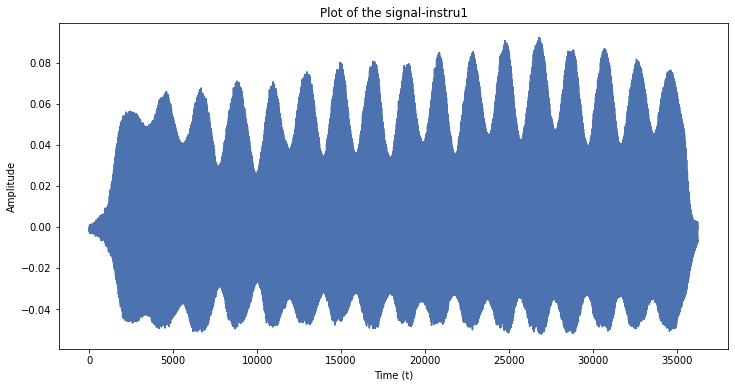

In [11]:
plt.plot(track)
plt.title("Plot of the signal-instru1")
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")

Text(0.5, 0, 'Frequency (Hz)')

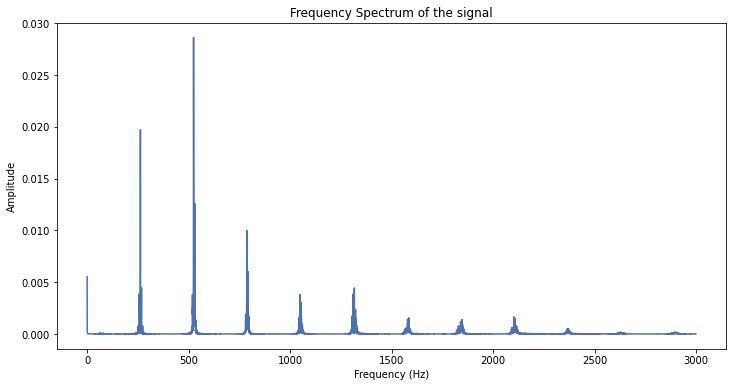

In [12]:
N_track, X_track = plot_mag(track, Fs_1, max_freq=3000, interpolate=True, normalization=True)
plt.title("Frequency Spectrum of the signal")
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")

array([14.90275862, 17.64      , 19.46482759, 20.68137931, 21.89793103,
       23.11448276, 24.02689655, 24.93931034, 25.85172414, 26.46      ,
       27.37241379, 27.98068966, 28.58896552, 29.50137931, 30.10965517,
       30.71793103, 31.3262069 , 32.23862069, 32.84689655, 33.45517241,
       34.36758621, 34.97586207, 35.88827586, 36.80068966, 37.71310345,
       38.92965517, 40.1462069 , 41.36275862, 43.18758621, 45.92482759])

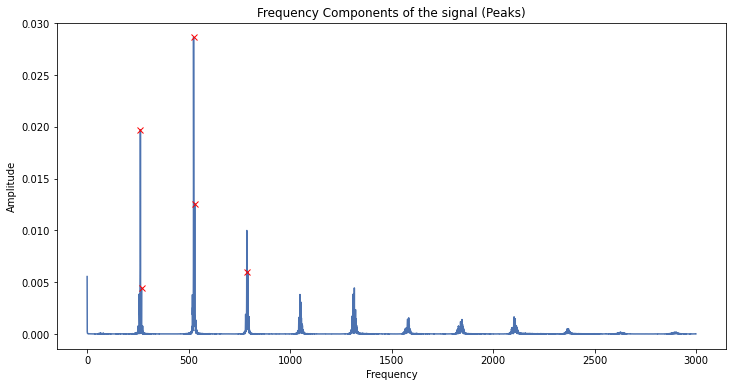

In [13]:
peak_track, _ = sp.find_peaks(X_track, threshold=0.0025)
plt.plot(N_track, X_track)
plt.plot(N_track[peak_track], X_track[peak_track],'rx')
plt.title("Frequency Components of the signal (Peaks)")
plt.ylabel("Amplitude")
plt.xlabel("Frequency")
N_track[peak]

In [14]:
def plot_spectrum_samples(X, Fs, window, samples, nperseg, noverlap):
  fig = plt.figure()
  freqs, time, Sxx = sp.spectrogram(X, fs=Fs, window=(window), nperseg=nperseg, noverlap=noverlap)
  plt.pcolormesh(time[0:samples], freqs[0:samples], Sxx[0:samples, 0:samples], shading='gouraud')
  cbar = plt.colorbar()
  cbar.set_label("Amplitude")
  cbar.minorticks_on()
  plt.xlabel("Time (t)")
  plt.ylabel("Frequency (Hz)")
  return freqs, time, Sxx

Text(0.5, 1.0, 'Spectrogram of instru1 using hamming window of 2250 samples with 10 samples overlap')

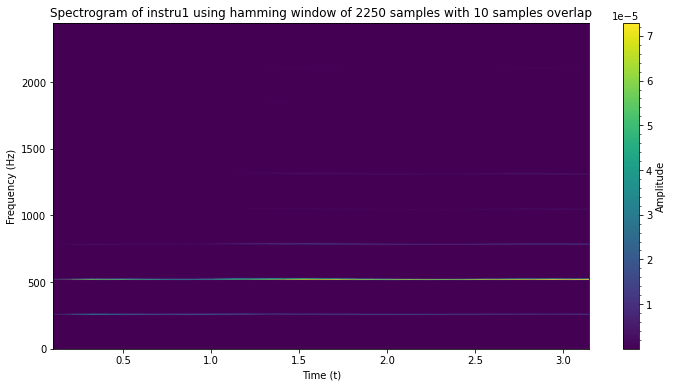

In [15]:
freqs, time, Sxx = plot_spectrum_samples(track, Fs_1, 'hamming', 500, nperseg=2250, noverlap=10)
plt.title("Spectrogram of instru1 using hamming window of 2250 samples with 10 samples overlap")

[264.6 524.3 788.9]


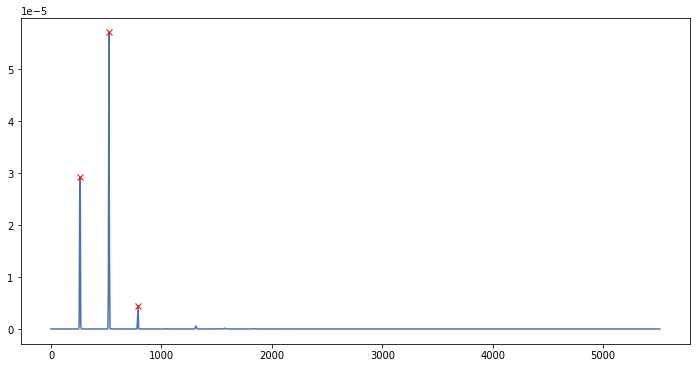

In [16]:
peak, _= sp.find_peaks(Sxx[:,1],threshold = 0.000001)
plt.plot(freqs, Sxx[ : , 1])
plt.plot(freqs[peak], Sxx[: , 1][peak], 'rx')
print(freqs[peak])

In [17]:
Fs_1, track = wavfile.read("Opera.wav")
track = track/32767.0
IPython.display.Audio(track, rate =  Fs_1)

Text(0, 0.5, 'Amplitude')

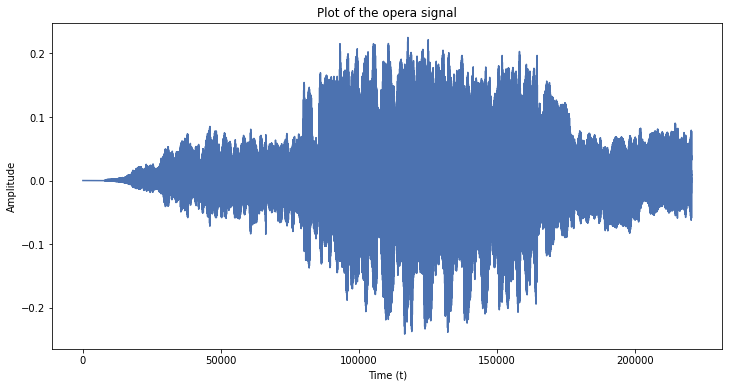

In [18]:
plt.plot(track)
plt.title("Plot of the opera signal")
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")

Text(0.5, 1.0, 'Spectrogram of instru1 using hamming window of 2205 samples for 1')

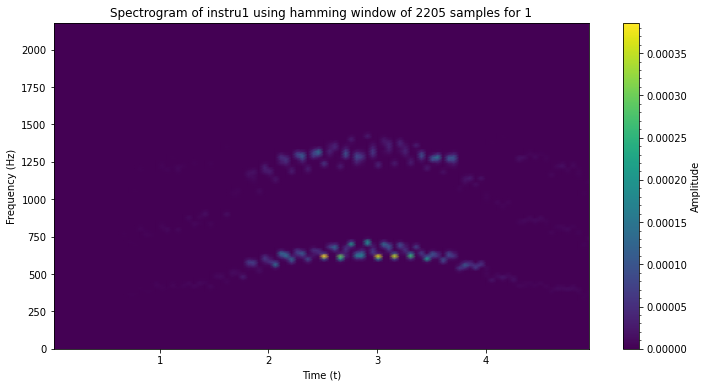

In [19]:
freqs, time, Sxx = plot_spectrum_samples(track, Fs_1, 'hamming', 110, nperseg=2205, noverlap=10)
plt.title("Spectrogram of instru1 using hamming window of 2205 samples for 1")

## Problem 3

In [20]:
import librosa    
track, Fs_1 = librosa.load('dsp.wav', sr=4000)
IPython.display.Audio(track, rate =  Fs_1)

Text(0, 0.5, 'Amplitude')

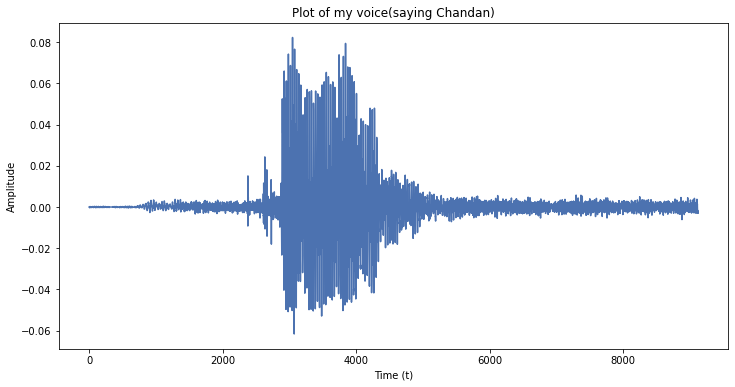

In [21]:
plt.plot(track)
plt.title("Plot of my voice(saying Chandan)")
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")

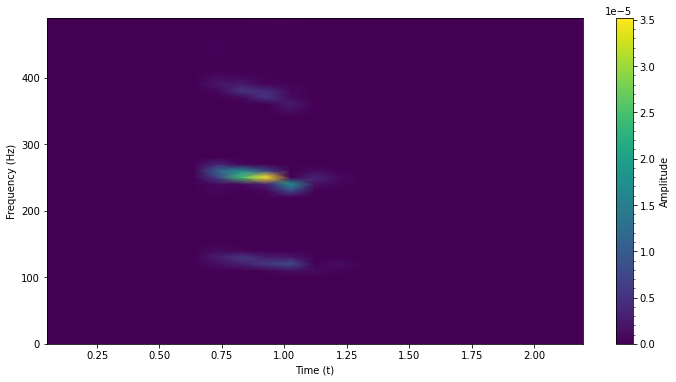

In [22]:
freqs, time, Sxx = plot_spectrum_samples(track, Fs_1, 'hamming', 50, nperseg=400, noverlap=10)

Text(0.5, 0, 'Frequency (Hz)')

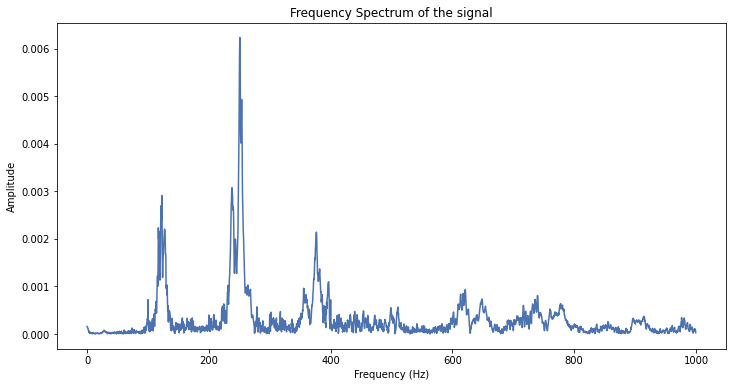

In [23]:
N_track, X_track = plot_mag(track, Fs_1, max_freq= 1000, interpolate=True, normalization=True)
plt.title("Frequency Spectrum of the signal")
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")

array([100.        , 117.10526316, 121.92982456, 122.80701754,
       131.57894737, 200.        , 253.94736842, 300.        ,
       301.75438596, 310.96491228, 389.03508772, 400.        ])

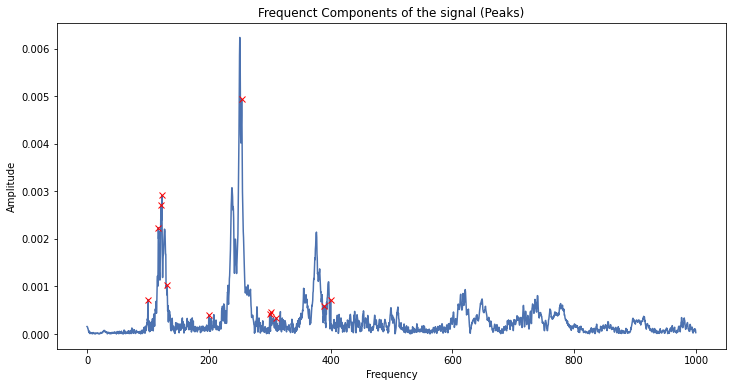

In [24]:
peak, _ = sp.find_peaks(X_track, threshold=0.00019)
plt.plot(N_track, X_track)
plt.plot(N_track[peak], X_track[peak],'rx')
plt.title("Frequenct Components of the signal (Peaks)")
plt.ylabel("Amplitude")
plt.xlabel("Frequency")
N_track[peak]